In [1]:
import cv2

from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

import scipy as sp
import numpy as np


In [2]:
nonoise_vid = cv2.VideoCapture('./1tagvideo.mp4')
if (nonoise_vid.isOpened() == False):
	print("Error opening the video file")
else:
  # Get frame rate information

  fps = int(nonoise_vid.get(5))
  print("Frame Rate : ",fps,"frames per second")	

  # Get frame count
  frame_count = nonoise_vid.get(7)
  print("Frame count : ", frame_count)


Frame Rate :  26 frames per second
Frame count :  787.0


In [3]:
frames = []
while(nonoise_vid.isOpened()):
	# nonoise_vid.read() methods returns a tuple, first element is a bool 
	# and the second is frame
  ret, frame = nonoise_vid.read()
  if ret == True:
    #Split the channels and invert color of the frame as we are only interested in the red channel
    frames.append(frame)
  else:
    break

/home/eurus/anaconda3/envs/enpm673_homework1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:736: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x = np.array(x, subok=True, copy=copy)


TypeError: Image data of dtype object cannot be converted to float

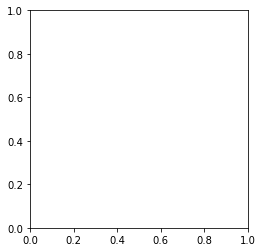

In [5]:
img= cv2.cvtColor(frames[0],cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(1280,720))
img = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
# cv2.imshow("Image",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(img)

In [5]:
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from scipy import fftpack

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


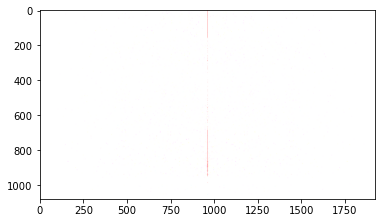

In [6]:
plt.imshow(np.abs(fftpack.fft2(frames[0])),norm=LogNorm(vmin=5))

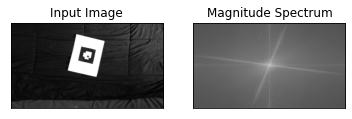

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.cvtColor(frames[0], cv2.COLOR_BGR2GRAY)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [24]:
threshold = fshift>(magnitude_spectrum[int(magnitude_spectrum.shape[0]/2),int(magnitude_spectrum.shape[1]/2)]*0.01)

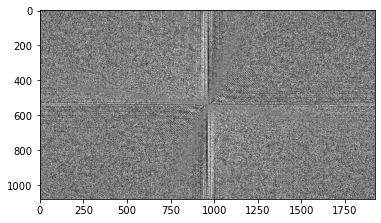

In [25]:
plt.imshow(threshold)